In [1]:
using Dates
using Awabi
using WordCloud

# テキストに含まれる単語の出現数を求める
function countmorph(file::String)::Dict{String, Int}
    # 形態素解析の初期化（辞書の設定）
    tokenizer = Tokenizer("/home/studio-lab-user/mecab/etc/mecabrc")

    count = Dict{String, Int}()
    open(file) do f
        for line in eachline(f)
            # 一行を形態素解析
            tokens = tokenize(tokenizer, line)
            for token in tokens
                surface = token[1]
                hinsi = split(token[2], ",")
                # 一文字のひらがな・カタカナ・長音「ー」・波線「〜」を対象外にする
                if hinsi[1] == "名詞" && (length(surface) > 1 || ((surface < "ぁ" || surface > "ヶ") && !(surface in ["ー", "～"])))
                    count[surface] = get(count, surface, 0) + 1
                end
            end
        end
    end
    count
end


countmorph (generic function with 1 method)

In [2]:
# 解析対象のテキスト
textfile = "text/alice_jp.txt" # "text/kokoro.txt"

# テキストを形態素解析し、単語の出現数一覧を求める
word_counts = countmorph(textfile)

Dict{String, Int64} with 1715 entries:
  "面会"    => 1
  "そいつ"  => 21
  "かま"    => 1
  "始まり"  => 2
  "厚紙"    => 1
  "ひま"    => 6
  "姉妹"    => 2
  "むりをち… => 1
  "むり"    => 2
  "むちゃく… => 1
  "算"      => 5
  "しょうが… => 2
  "たか"    => 1
  "らち"    => 1
  "勝ち"    => 2
  "きみ"    => 6
  "ふたり"  => 11
  "せい"    => 14
  "紙切れ"  => 1
  "せわ"    => 1
  "ほり"    => 1
  "ぅん"    => 2
  "類"      => 1
  "葉っぱ"  => 3
  "絵"      => 5
  ⋮         => ⋮

In [3]:
# 除外する表記の一覧
ngwords = ["こと", "もの"]
# 最小出現数：出現数が極端に小さい単語を除外するため
mincount = 10
# 出現数一覧から指定に基づいて除外
word_counts = Dict((k, v) for (k, v) in collect(word_counts) if v >= mincount && ! (k in ngwords))

Dict{String, Int64} with 169 entries:
  "そい… => 21
  "ふた… => 11
  "先"   => 23
  "せい" => 14
  "ぼう… => 59
  "ネズ… => 48
  "足"   => 20
  "へん… => 14
  "返事" => 16
  "続き" => 10
  "まわ… => 12
  "３"   => 37
  "みた… => 41
  "御前" => 44
  "ちゃ… => 13
  "ヤマ… => 33
  "はず" => 14
  "あな… => 24
  "たく… => 12
  "とき" => 44
  "相手" => 16
  "それ" => 60
  "１"   => 73
  "庭"   => 22
  "すて… => 16
  ⋮      => ⋮

mask size: 900×900, content area: 423² (33²/word)
set fontsize ∈ [8.0, 900]
set density = 0.5
The word "アリス"(203.78502973129378) is too big. Set maxfontsize = 116.18180871731697.
⋯scale=36.38672948810097, density=0.4923226855265805	↓
fontsize ∈ [8.0, 116.18180871731697]
66 words(39%) are limited to the minimum font size.
center the word "アリス"
▸1. scale = 36.66934059114561
12 epochs


┌ Warning: Some words are limited to the maximum font size. Please set a `maxfontsize` in `wordcloud` or set a `maxweight` in `processtext`.
└ @ WordCloud /home/studio-lab-user/.julia/packages/WordCloud/kNUgd/src/wc-method.jl:65
┌ Info: nepoch: 1000, patient: 10
└ @ Stuffing.Trainer /home/studio-lab-user/.julia/packages/Stuffing/oYQwL/src/fit.jl:482
┌ Info: @epoch 11(+3), 2(2) collisions, reposition [170] to [(671, 579)]
└ @ Stuffing.Trainer /home/studio-lab-user/.julia/packages/Stuffing/oYQwL/src/fit.jl:494
┌ Warning: embed bitmap into SVG. You can set `background=false` to remove background.
└ @ WordCloud /home/studio-lab-user/.julia/packages/WordCloud/kNUgd/src/wc-helper.jl:94


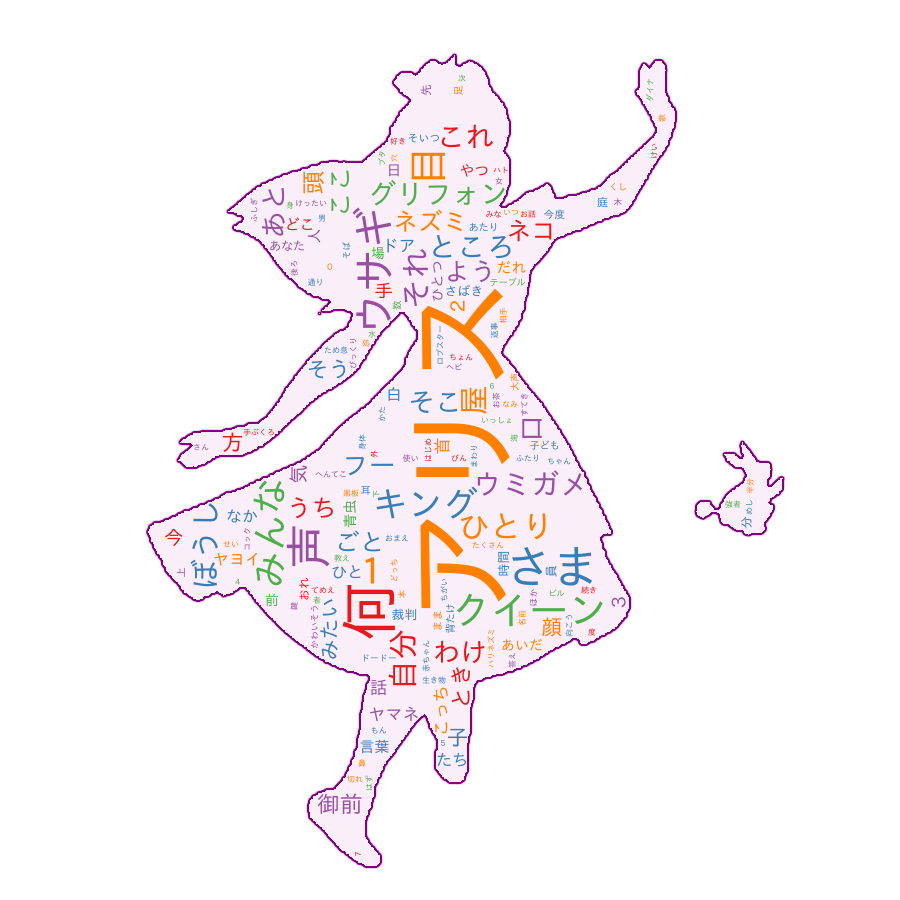

In [4]:
# 表示する形状
maskfile = pkgdir(WordCloud)*"/res/alice_mask.png"

# ワードクラウドの作成
wc = wordcloud(
    word_counts, 
    mask = maskfile,
    maskcolor="#faeef8",
    outline = 4,
    linecolor = "purple",
    colors = :Set1_5,
    angles = (0, 90),
    fonts = "ipaexg",  #"Tahoma",
    density = 0.5) |> generate!

# 出力
outfile = "out/" * Dates.format(now(), "yyyymmddHHMMSS") * ".svg"
paint(wc, outfile)